# Analysis of 2023 Keeratisiroj Data - Self Active Aging Index (Northern Provinces, Thailand, 2018 data)
- https://www.nature.com/articles/s41598-023-29788-2#Sec15
- Keeratisiroj, O., Kitreerawutiwong, N. & Mekrungrongwong, S. Development of Self-Active Aging Index (S-AAI) among rural elderly in lower northern Thailand classified by age and gender. Sci Rep 13, 2676 (2023). https://doi.org/10.1038/s41598-023-29788-2
- Excel Data source:  https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-023-29788-2/MediaObjects/41598_2023_29788_MOESM4_ESM.xlsx

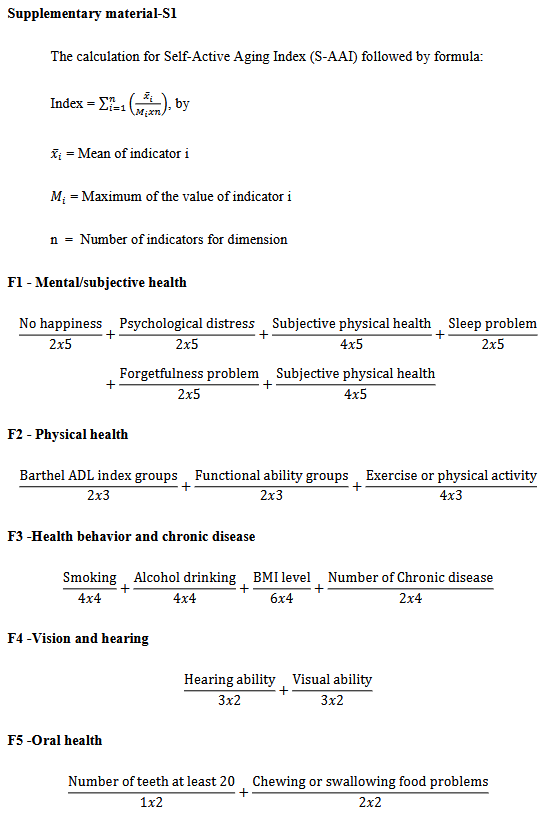

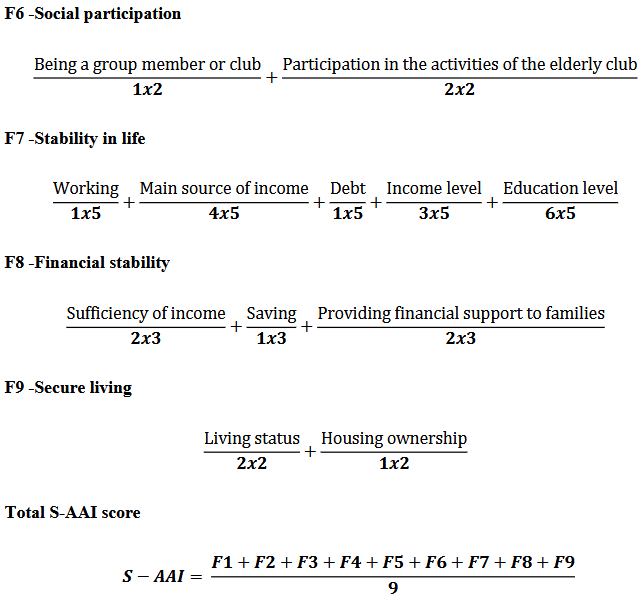

In [1]:
import pandas as pd

In [73]:

def to_AgeGroup(df, intervals=[5,9,10,90][0], age_col='age'):
    if isinstance(intervals,int):
        bins = {5:[64,69,74,79,84,89,94,99,np.inf],
                9:[64,69,79,89,99,np.inf],
                10:[64,70,80,90,np.inf],
                90:[64,69,74,79,84,89,94,np.inf],
                605:[59,69,74,79,84,89,94,99,np.inf],
                609:[59,69,79,89,99,np.inf],
                6010:[59,70,80,90,np.inf],
                6015:[59,65,70,75,80,85,90,np.inf],
                6090:[59,69,74,79,84,89,94,np.inf],
               }[intervals]
    elif isinstance(intervals,str):
        bins = {'60+':[59,np.inf],
                '70+':[70,np.inf],
                '80+':[80,np.inf],
                '90+':[90,np.inf],
               }[intervals]
    else:
        bins = intervals
    age_labels = [f'{a}-{b}' for a,b in list(zip(bins,bins[1:]))]
    return pd.cut(df[age_col], bins, labels=age_labels)


In [79]:
# df = pd.read_excel('../data/2023_Keeratisiroj_Data_41598_2023_29788_MOESM4_ESM (version 1).xlsx')
df = pd.read_excel('https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-023-29788-2/MediaObjects/41598_2023_29788_MOESM4_ESM.xlsx')

In [80]:
columns = ['F1_Raw', 'F2_Raw', 'F3_Raw', 'F4_Raw', 'F5_Raw', 'F6_Raw', 'F7_Raw', 'F8_Raw', 'F9_Raw', 'S_AAI']

In [81]:
df['age']
df['AgeGroup'] = to_AgeGroup(df, 6010)
age_cols = []
ag_groups = []
for ag in ['60+','70+','80+','90+']:
    df['AgeGroup_'+ag] = to_AgeGroup(df, ag)
    age_cols += ['AgeGroup_'+ag]
    ag_groups += df['AgeGroup_'+ag].unique().dropna().tolist()

In [82]:
def proportions(df, age_cols, ag_groups, cols, col_text, lt_threshold=0.5):
    res = []
    text = []
    for col in cols:
        r = {}
        r['col'] = col_text[col]
        r['col2'] = col
        for a in df['AgeGroup'].unique():
            d = df[(df['AgeGroup']==a)&(df[col]<lt_threshold)][col].count()
            g = df[(df['AgeGroup']==a)][col].count()
            text += [a, col, d,g, round((d/g)*100,2)]
            r[a] = round((d/g)*100,1)
        for (ac,ag) in zip(age_cols,ag_groups):
            d = df[(df[ac]==ag)&(df[col]<lt_threshold)][col].count()
            g = df[(df[ac]==ag)][col].count()
            text += [ag, col, d,g, round((d/g)*100,2)]
            r[ag.replace('-inf','+')] = round((d/g)*100,1)
        res += [r]
    return pd.DataFrame.from_records(res).T.sort_index().T.set_index('col'), text

lt_threshold = 0.5
cols = ['S_AAI']+[f'F{i+1}_Raw' for i in range(9)]
col_text = {k:v for k,v in zip(cols, [c+f' below {int(lt_threshold*100)}%' for c in ['Self-Active Aging Index (S-AAI)',
                                                             'Mental/Subjective health',
                                                             'Physical health',
                                                             'Health behavior/chronic disease',
                                                             'Vision and hearing',
                                                             'Oral health',
                                                             'Social participation',
                                                             'Stability in life',
                                                             'Financial stability ',
                                                             'Secure living']])}


dfr, text_list = proportions(df, age_cols, ag_groups, cols, col_text)
dfr.drop(['90-inf','col2'],axis=1)

,59+,59-70,70+,70-80,80+,80-90,90+
col,,,,,,,
Self-Active Aging Index (S-AAI) below 50%,6.3,3.6,9.4,7.1,15.0,15.4,9.1
Mental/Subjective health below 50%,23.0,21.5,24.9,22.8,29.9,30.1,27.3
Physical health below 50%,7.7,3.7,12.1,8.0,22.4,22.1,27.3
Health behavior/chronic disease below 50%,6.0,8.0,3.7,4.1,2.7,2.9,0.0
Vision and hearing below 50%,11.1,12.4,9.6,9.9,8.8,8.8,9.1
Oral health below 50%,37.9,26.6,50.9,45.6,63.9,64.7,54.5
Social participation below 50%,35.6,31.2,40.7,37.9,47.6,48.5,36.4
Stability in life below 50%,57.5,76.3,35.8,44.2,15.0,15.4,9.1
Financial stability below 50%,45.3,39.9,51.5,52.2,49.7,51.5,27.3
